In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
df=pd.read_csv("data/wolbachia_phage_ratio.tsv", sep="\t", header=0)
df

,Sample,phage,nonphage,ratio,color
0,MEMO001,2.606444,2.953885,0.882378,<1.75
1,MEMO002,0.073425,0.101819,0.721134,<1.75
2,MEMO003,1.028298,2.875982,0.357547,<1.75
3,MEMO004,0.002841,3.345088,0.000849,<1.75
4,MEMO005,16.631866,10.783060,1.542407,<1.75
...,...,...,...,...,...
192,NEMO50,1.067916,0.998846,1.069150,<1.75
193,NEMO51,5.010867,3.278520,1.528393,<1.75
194,NEMO52,2.656743,3.688188,0.720338,<1.75
195,NEMO53,8.749780,4.701102,1.861219,>1.75


In [30]:
df['bool']=df['ratio']>4
df

,Sample,phage,nonphage,ratio,color,bool
0,MEMO001,2.606444,2.953885,0.882378,Prophage,False
1,MEMO002,0.073425,0.101819,0.721134,Prophage,False
2,MEMO003,1.028298,2.875982,0.357547,Prophage,False
3,MEMO004,0.002841,3.345088,0.000849,Prophage,False
4,MEMO005,16.631866,10.783060,1.542407,Prophage,False
...,...,...,...,...,...,...
192,NEMO50,1.067916,0.998846,1.069150,Prophage,False
193,NEMO51,5.010867,3.278520,1.528393,Prophage,False
194,NEMO52,2.656743,3.688188,0.720338,Prophage,False
195,NEMO53,8.749780,4.701102,1.861219,Prophage,False


In [31]:
temp = {True:'Real phage particle?', False:'Prophage'}
df['color'] = df['bool'].map(temp)
df.drop('bool', axis=1, inplace=True)
df

,Sample,phage,nonphage,ratio,color
0,MEMO001,2.606444,2.953885,0.882378,Prophage
1,MEMO002,0.073425,0.101819,0.721134,Prophage
2,MEMO003,1.028298,2.875982,0.357547,Prophage
3,MEMO004,0.002841,3.345088,0.000849,Prophage
4,MEMO005,16.631866,10.783060,1.542407,Prophage
...,...,...,...,...,...
192,NEMO50,1.067916,0.998846,1.069150,Prophage
193,NEMO51,5.010867,3.278520,1.528393,Prophage
194,NEMO52,2.656743,3.688188,0.720338,Prophage
195,NEMO53,8.749780,4.701102,1.861219,Prophage


In [32]:
meta=pd.read_csv("data/BEmosq_metadata.csv", sep=";", header=0)
meta.drop(meta[meta.Species == 'control'].index, inplace=True)
meta

,Sample,PCR_Subspecies,SKA_Subspecies,Species,Sex,Location,Control,lat,long,Municipality
0,MEMO001,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995.194,5.621.833,Maasmechelen
1,MEMO002,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995.194,5.621.833,Maasmechelen
2,MEMO003,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995.194,5.621.833,Maasmechelen
3,MEMO004,Culex torrentium,Culex torrentium,Culex torrentium,female,MM,No,50.995.194,5.621.833,Maasmechelen
4,MEMO005,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995.194,5.621.833,Maasmechelen
...,...,...,...,...,...,...,...,...,...,...
193,NEMO50,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865.688,4.630.034,Bertem
194,NEMO51,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865.688,4.630.034,Bertem
195,NEMO52,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865.688,4.630.034,Bertem
196,NEMO53,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865.688,4.630.034,Bertem


In [33]:
ratiodf=pd.merge(df, meta, on="Sample", how="outer")
ratiodf

,Sample,phage,nonphage,ratio,color,PCR_Subspecies,SKA_Subspecies,Species,Sex,Location,Control,lat,long,Municipality
0,MEMO001,2.606444,2.953885,0.882378,Prophage,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995.194,5.621.833,Maasmechelen
1,MEMO002,0.073425,0.101819,0.721134,Prophage,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995.194,5.621.833,Maasmechelen
2,MEMO003,1.028298,2.875982,0.357547,Prophage,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995.194,5.621.833,Maasmechelen
3,MEMO004,0.002841,3.345088,0.000849,Prophage,Culex torrentium,Culex torrentium,Culex torrentium,female,MM,No,50.995.194,5.621.833,Maasmechelen
4,MEMO005,16.631866,10.783060,1.542407,Prophage,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995.194,5.621.833,Maasmechelen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,NEMO51,5.010867,3.278520,1.528393,Prophage,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865.688,4.630.034,Bertem
194,NEMO52,2.656743,3.688188,0.720338,Prophage,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865.688,4.630.034,Bertem
195,NEMO53,8.749780,4.701102,1.861219,Prophage,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865.688,4.630.034,Bertem
196,NEMO54,0.267686,0.858332,0.311868,Prophage,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865.688,4.630.034,Bertem


In [34]:
ratiodf[ratiodf.ratio>2.5]

,Sample,phage,nonphage,ratio,color,PCR_Subspecies,SKA_Subspecies,Species,Sex,Location,Control,lat,long,Municipality
22,MEMO025,12.241615,4.847405,2.525395,Prophage,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,EU,No,50.632.556,6.073.283,Eupen
40,MEMO043,11.494711,2.790352,4.119448,Real phage particle?,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995.228,5.621.878,Maasmechelen
55,MEMO059,17.588757,6.652177,2.644060,Prophage,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,AT,No,51.213.647,4.192.997,Vrasene
90,MEMO095,8.881901,3.265434,2.719976,Prophage,Culex pipiens potential hybrid,Culex pipiens pipiens,Culex pipiens,female,VP,No,50.585.083,5.259.636,Villers-Le-Bouillet
100,MEMO105,14.387549,5.442591,2.643511,Prophage,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,EU,No,50.632.586,6.072.753,Eupen
121,MEMO127,248.494827,87.872828,2.827892,Prophage,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,male,MM,No,50.995.228,5.621.878,Maasmechelen
123,MEMO129,157.101770,54.098651,2.903987,Prophage,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,male,EU,No,50.632.586,6.072.753,Eupen
128,MEMO134,35.539954,12.969168,2.740342,Prophage,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,VP,No,50.585.083,5.259.636,Villers-Le-Bouillet


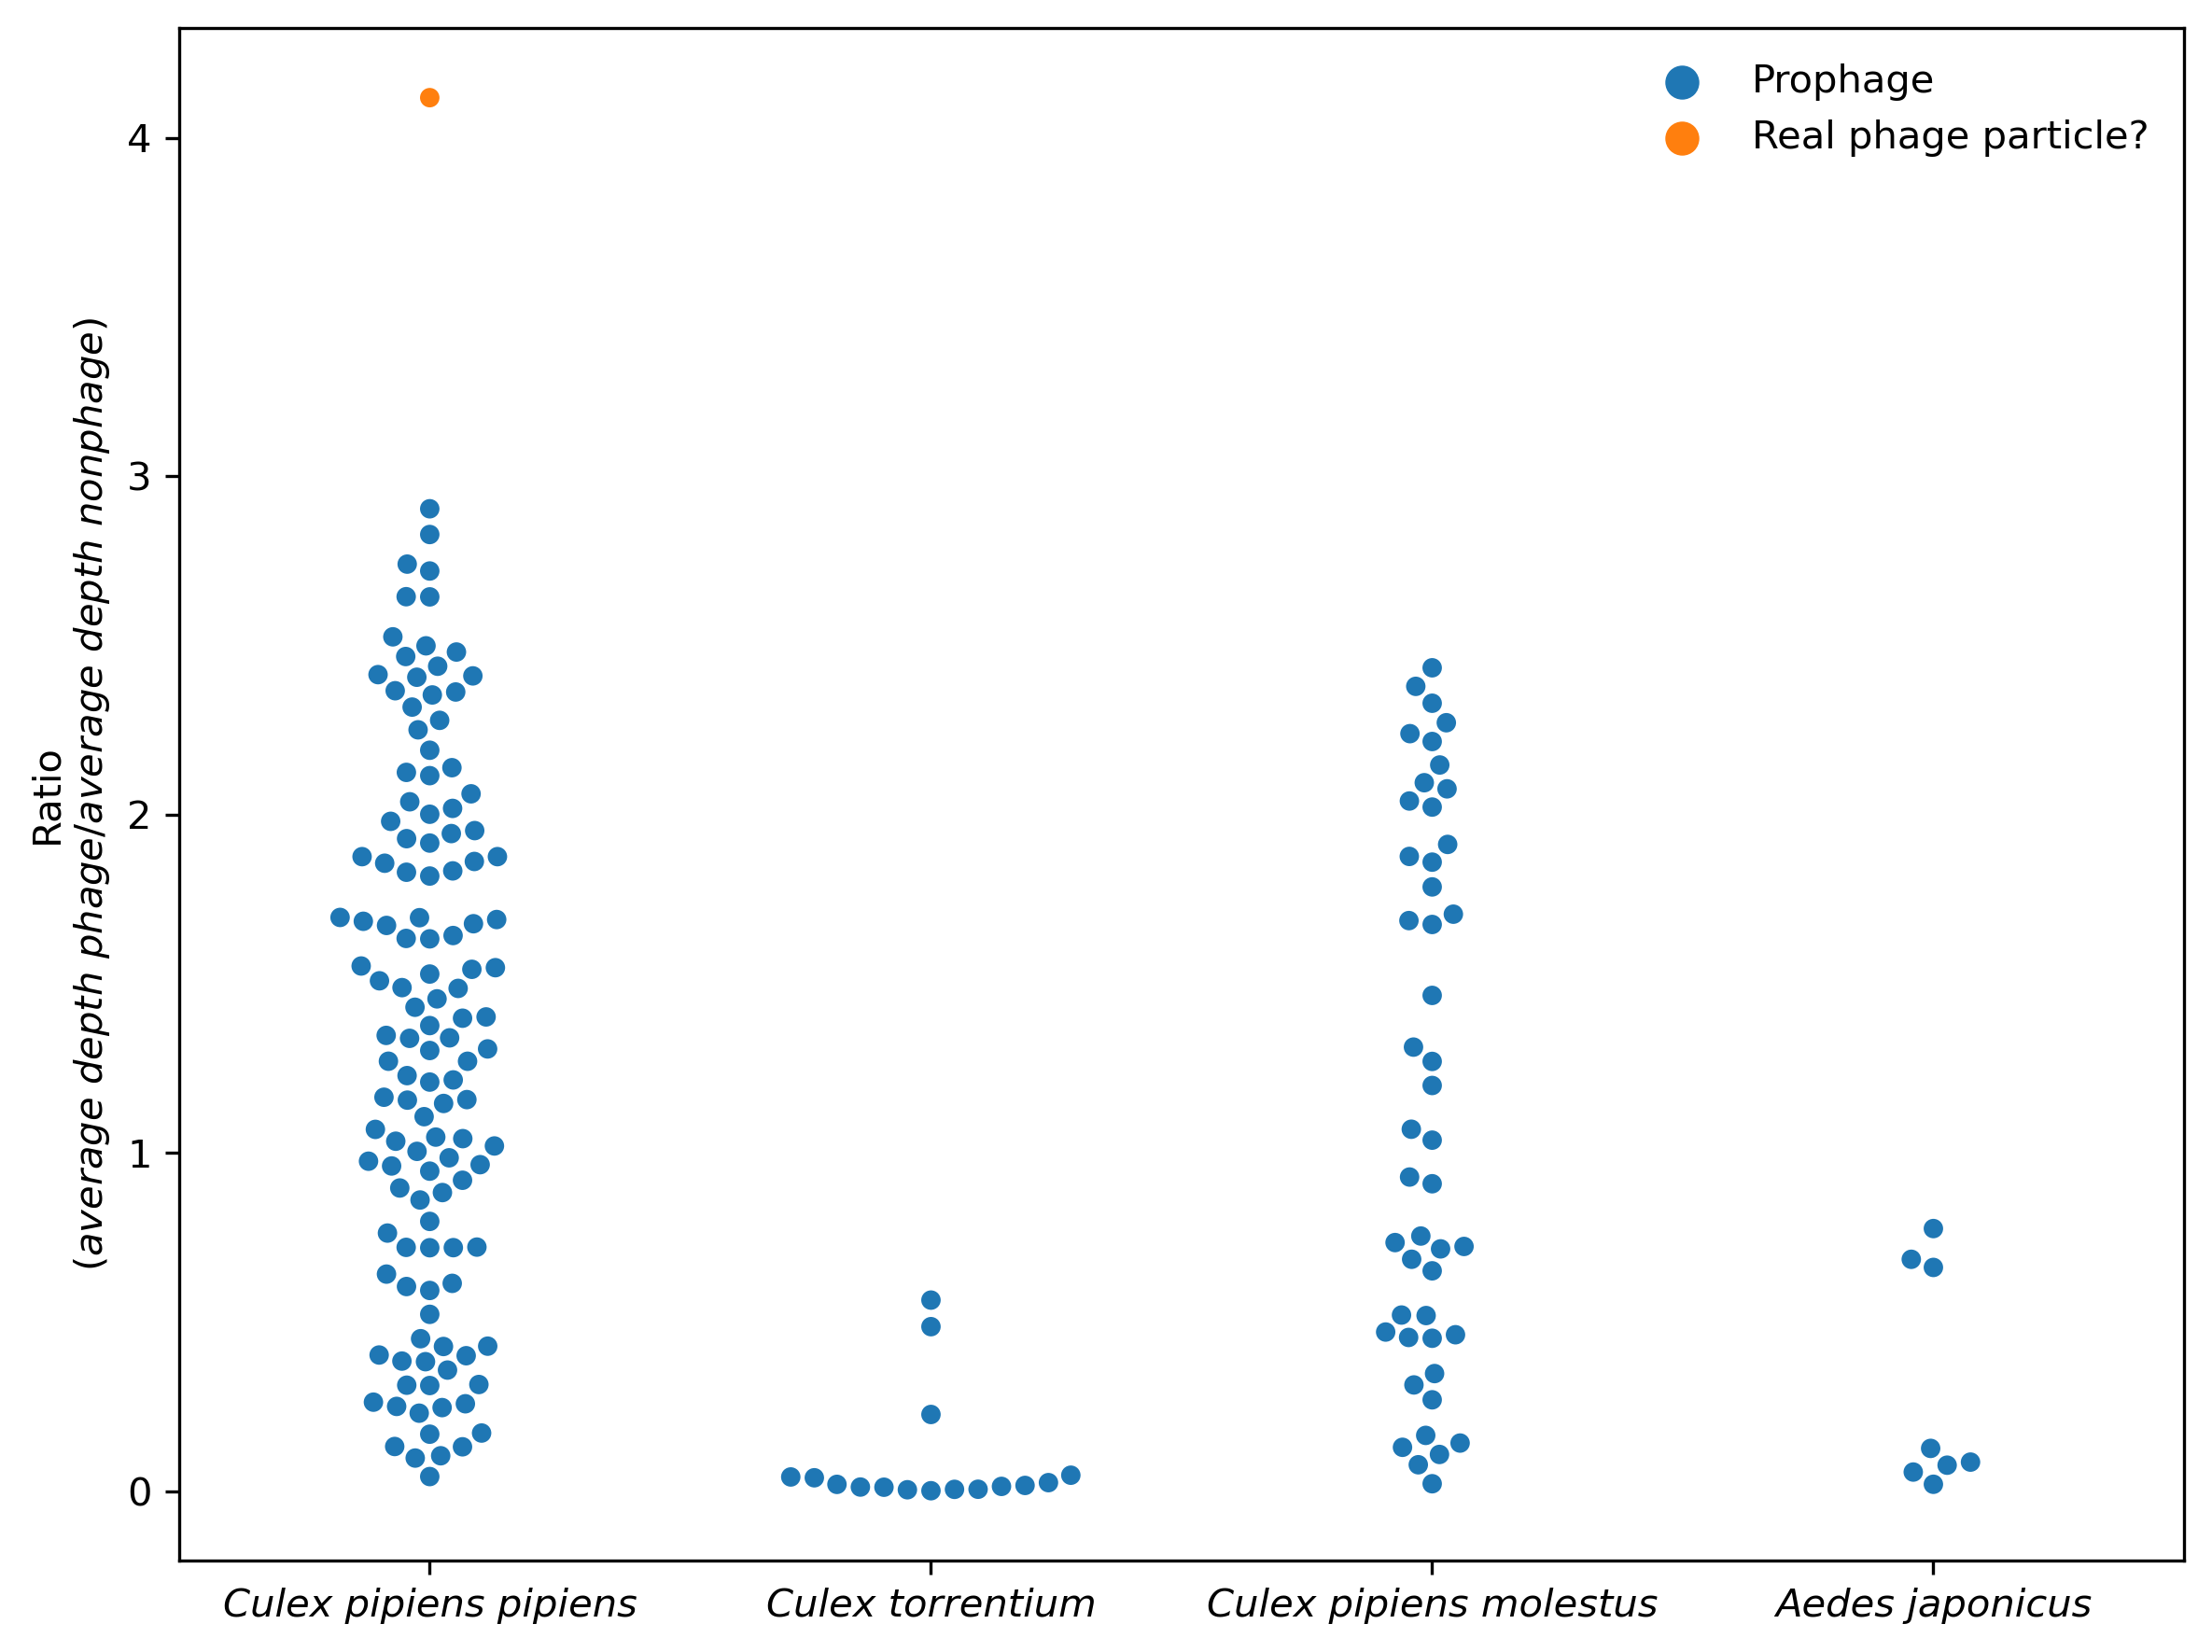

In [35]:
figure(figsize=(8, 6), dpi=300)
p=sns.swarmplot(data=ratiodf, y='ratio', hue='color', x='SKA_Subspecies')
p.set(xlabel=None, ylabel='Ratio\n$(average\ depth\ phage/average\ depth\ nonphage$)')
p.set_xticklabels(labels=ratiodf['SKA_Subspecies'].unique(), fontstyle ="italic")
p.legend(frameon=False).set_title(None)
plt.tight_layout()
plt.savefig("figures/phage_ratio.pdf", bbox_inches="tight", dpi=300)

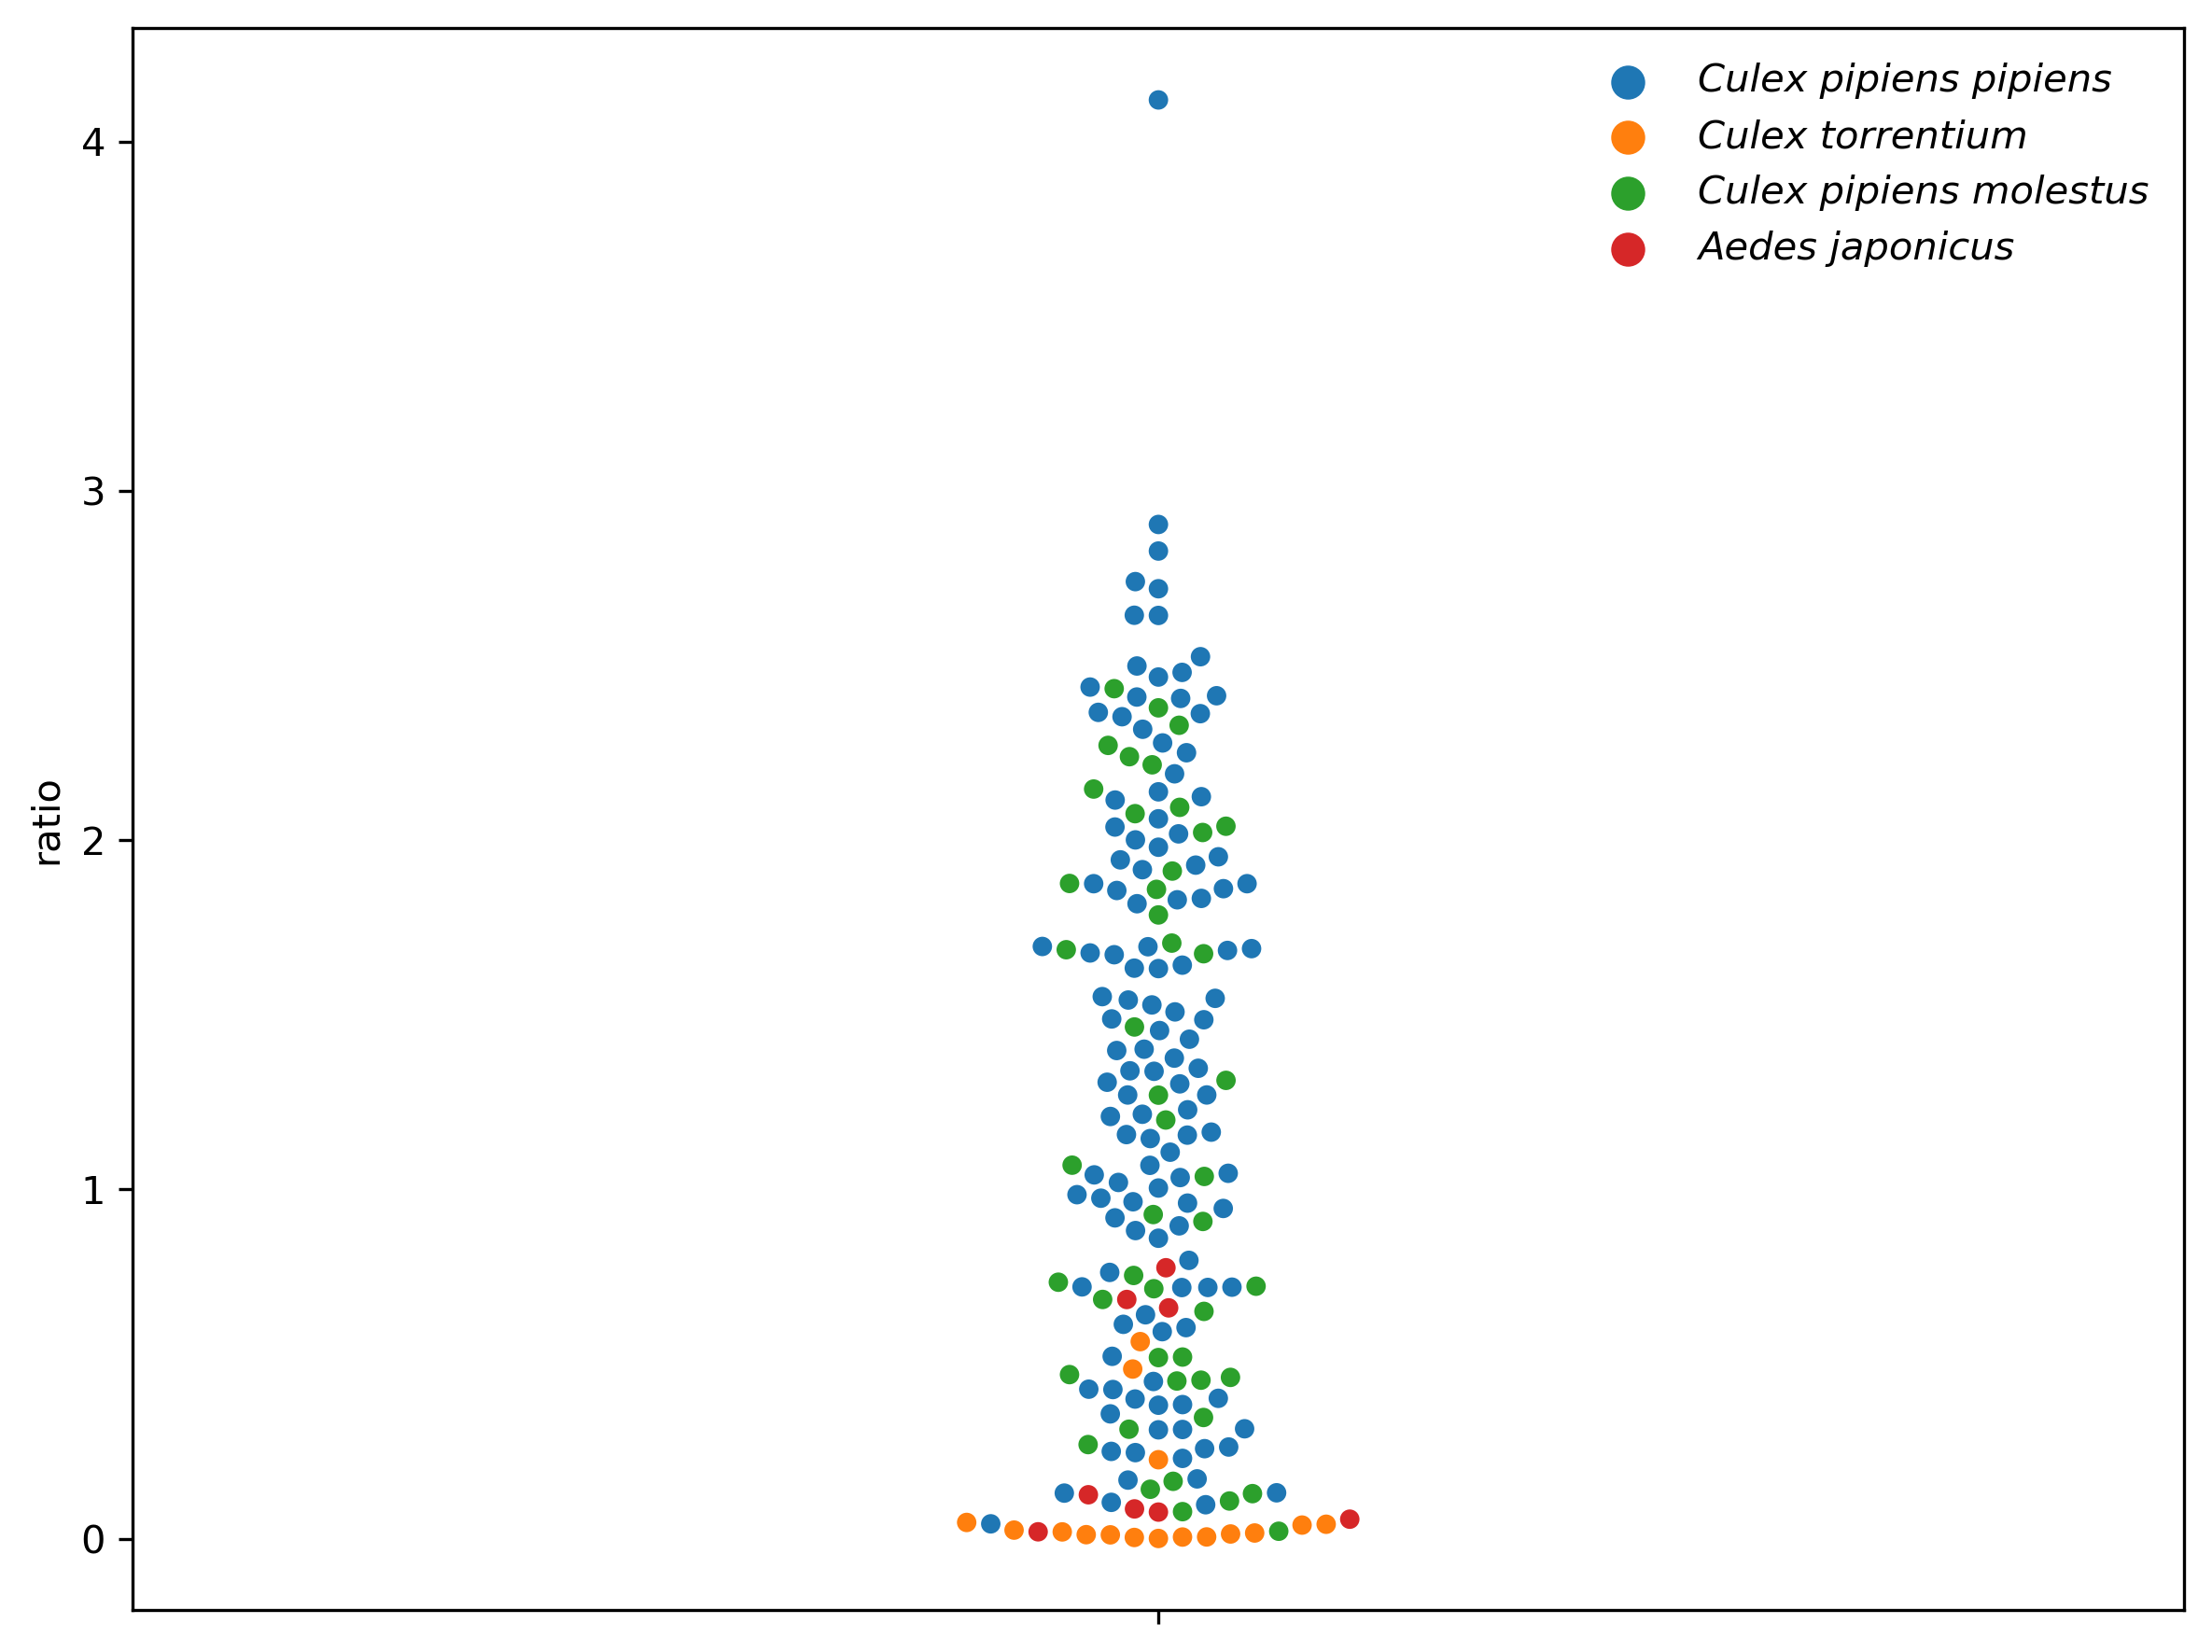

In [16]:
figure(figsize=(8, 6), dpi=300)
fig=sns.swarmplot(data=ratiodf, y='ratio', hue='SKA_Subspecies', x=[""]*len(ratiodf))
ax=fig.legend(frameon=False)
ax.set_title(None)
for text in ax.get_texts():
    text.set_fontstyle("italic")
plt.tight_layout()

In [15]:
ratiodf[ratiodf.ratio > 2]

,Sample,phage,nonphage,ratio,color,PCR_Subspecies,SKA_Subspecies,Species,Sex,Location,Control,lat,long,Municipality
8,MEMO010,7.446639,3.520916,2.114972,>1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995.194,5.621.833,Maasmechelen
10,MEMO012,7.797806,3.897208,2.000870,>1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,EU,No,50.632.556,6.073.283,Eupen
22,MEMO025,12.241615,4.847405,2.525395,>1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,EU,No,50.632.556,6.073.283,Eupen
23,MEMO026,30.785941,15.254449,2.018161,>1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,male,EU,No,50.632.556,6.073.283,Eupen
24,MEMO027,9.609877,4.523121,2.124612,>1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,EU,No,50.632.556,6.073.283,Eupen
36,MEMO039,20.194609,9.899338,2.039996,>1.75,Culex pipiens molestus,Culex pipiens molestus,Culex pipiens,female,MM,No,50.995.228,5.621.878,Maasmechelen
37,MEMO040,7.247657,3.002815,2.413621,>1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995.228,5.621.878,Maasmechelen
38,MEMO041,18.436677,7.792295,2.366014,>1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995.228,5.621.878,Maasmechelen
40,MEMO043,11.494711,2.790352,4.119448,>1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995.228,5.621.878,Maasmechelen
46,MEMO050,41.341831,19.742319,2.094072,>1.75,Culex pipiens molestus,Culex pipiens molestus,Culex pipiens,female,BA,No,50.412.581,3.923.411,Frameries


In [85]:
ratiodf['bool']=ratiodf['ratio'] > 2
ratiodf

,Sample,phage,nonphage,ratio,color,PCR_Subspecies,SKA_Subspecies,Species,Sex,Location,Control,lat,long,Municipality,bool
0,MEMO001,2.606444,2.953885,0.882378,<1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995194,5.621833,Maasmechelen,False
1,MEMO002,0.073425,0.101819,0.721134,<1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995194,5.621833,Maasmechelen,False
2,MEMO003,1.028298,2.875982,0.357547,<1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995194,5.621833,Maasmechelen,False
3,MEMO004,0.002841,3.345088,0.000849,<1.75,Culex torrentium,Culex torrentium,Culex torrentium,female,MM,No,50.995194,5.621833,Maasmechelen,False
4,MEMO005,16.631866,10.783060,1.542407,<1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995194,5.621833,Maasmechelen,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,NEMO50,1.067916,0.998846,1.069150,<1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865688,4.630034,Bertem,False
193,NEMO51,5.010867,3.278520,1.528393,<1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865688,4.630034,Bertem,False
194,NEMO52,2.656743,3.688188,0.720338,<1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865688,4.630034,Bertem,False
195,NEMO53,8.749780,4.701102,1.861219,>1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865688,4.630034,Bertem,False


In [92]:
ratiodf['natural_log'] = np.log(ratiodf['ratio'])
ratiodf

,Sample,phage,nonphage,ratio,color,PCR_Subspecies,SKA_Subspecies,Species,Sex,Location,Control,lat,long,Municipality,bool,natural_log
0,MEMO001,2.606444,2.953885,0.882378,<1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995194,5.621833,Maasmechelen,False,-0.125135
1,MEMO002,0.073425,0.101819,0.721134,<1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995194,5.621833,Maasmechelen,False,-0.326931
2,MEMO003,1.028298,2.875982,0.357547,<1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995194,5.621833,Maasmechelen,False,-1.028489
3,MEMO004,0.002841,3.345088,0.000849,<1.75,Culex torrentium,Culex torrentium,Culex torrentium,female,MM,No,50.995194,5.621833,Maasmechelen,False,-7.070939
4,MEMO005,16.631866,10.783060,1.542407,<1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,MM,No,50.995194,5.621833,Maasmechelen,False,0.433344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,NEMO50,1.067916,0.998846,1.069150,<1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865688,4.630034,Bertem,False,0.066864
193,NEMO51,5.010867,3.278520,1.528393,<1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865688,4.630034,Bertem,False,0.424217
194,NEMO52,2.656743,3.688188,0.720338,<1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865688,4.630034,Bertem,False,-0.328034
195,NEMO53,8.749780,4.701102,1.861219,>1.75,Culex pipiens pipiens,Culex pipiens pipiens,Culex pipiens,female,Bertem,No,50.865688,4.630034,Bertem,False,0.621232


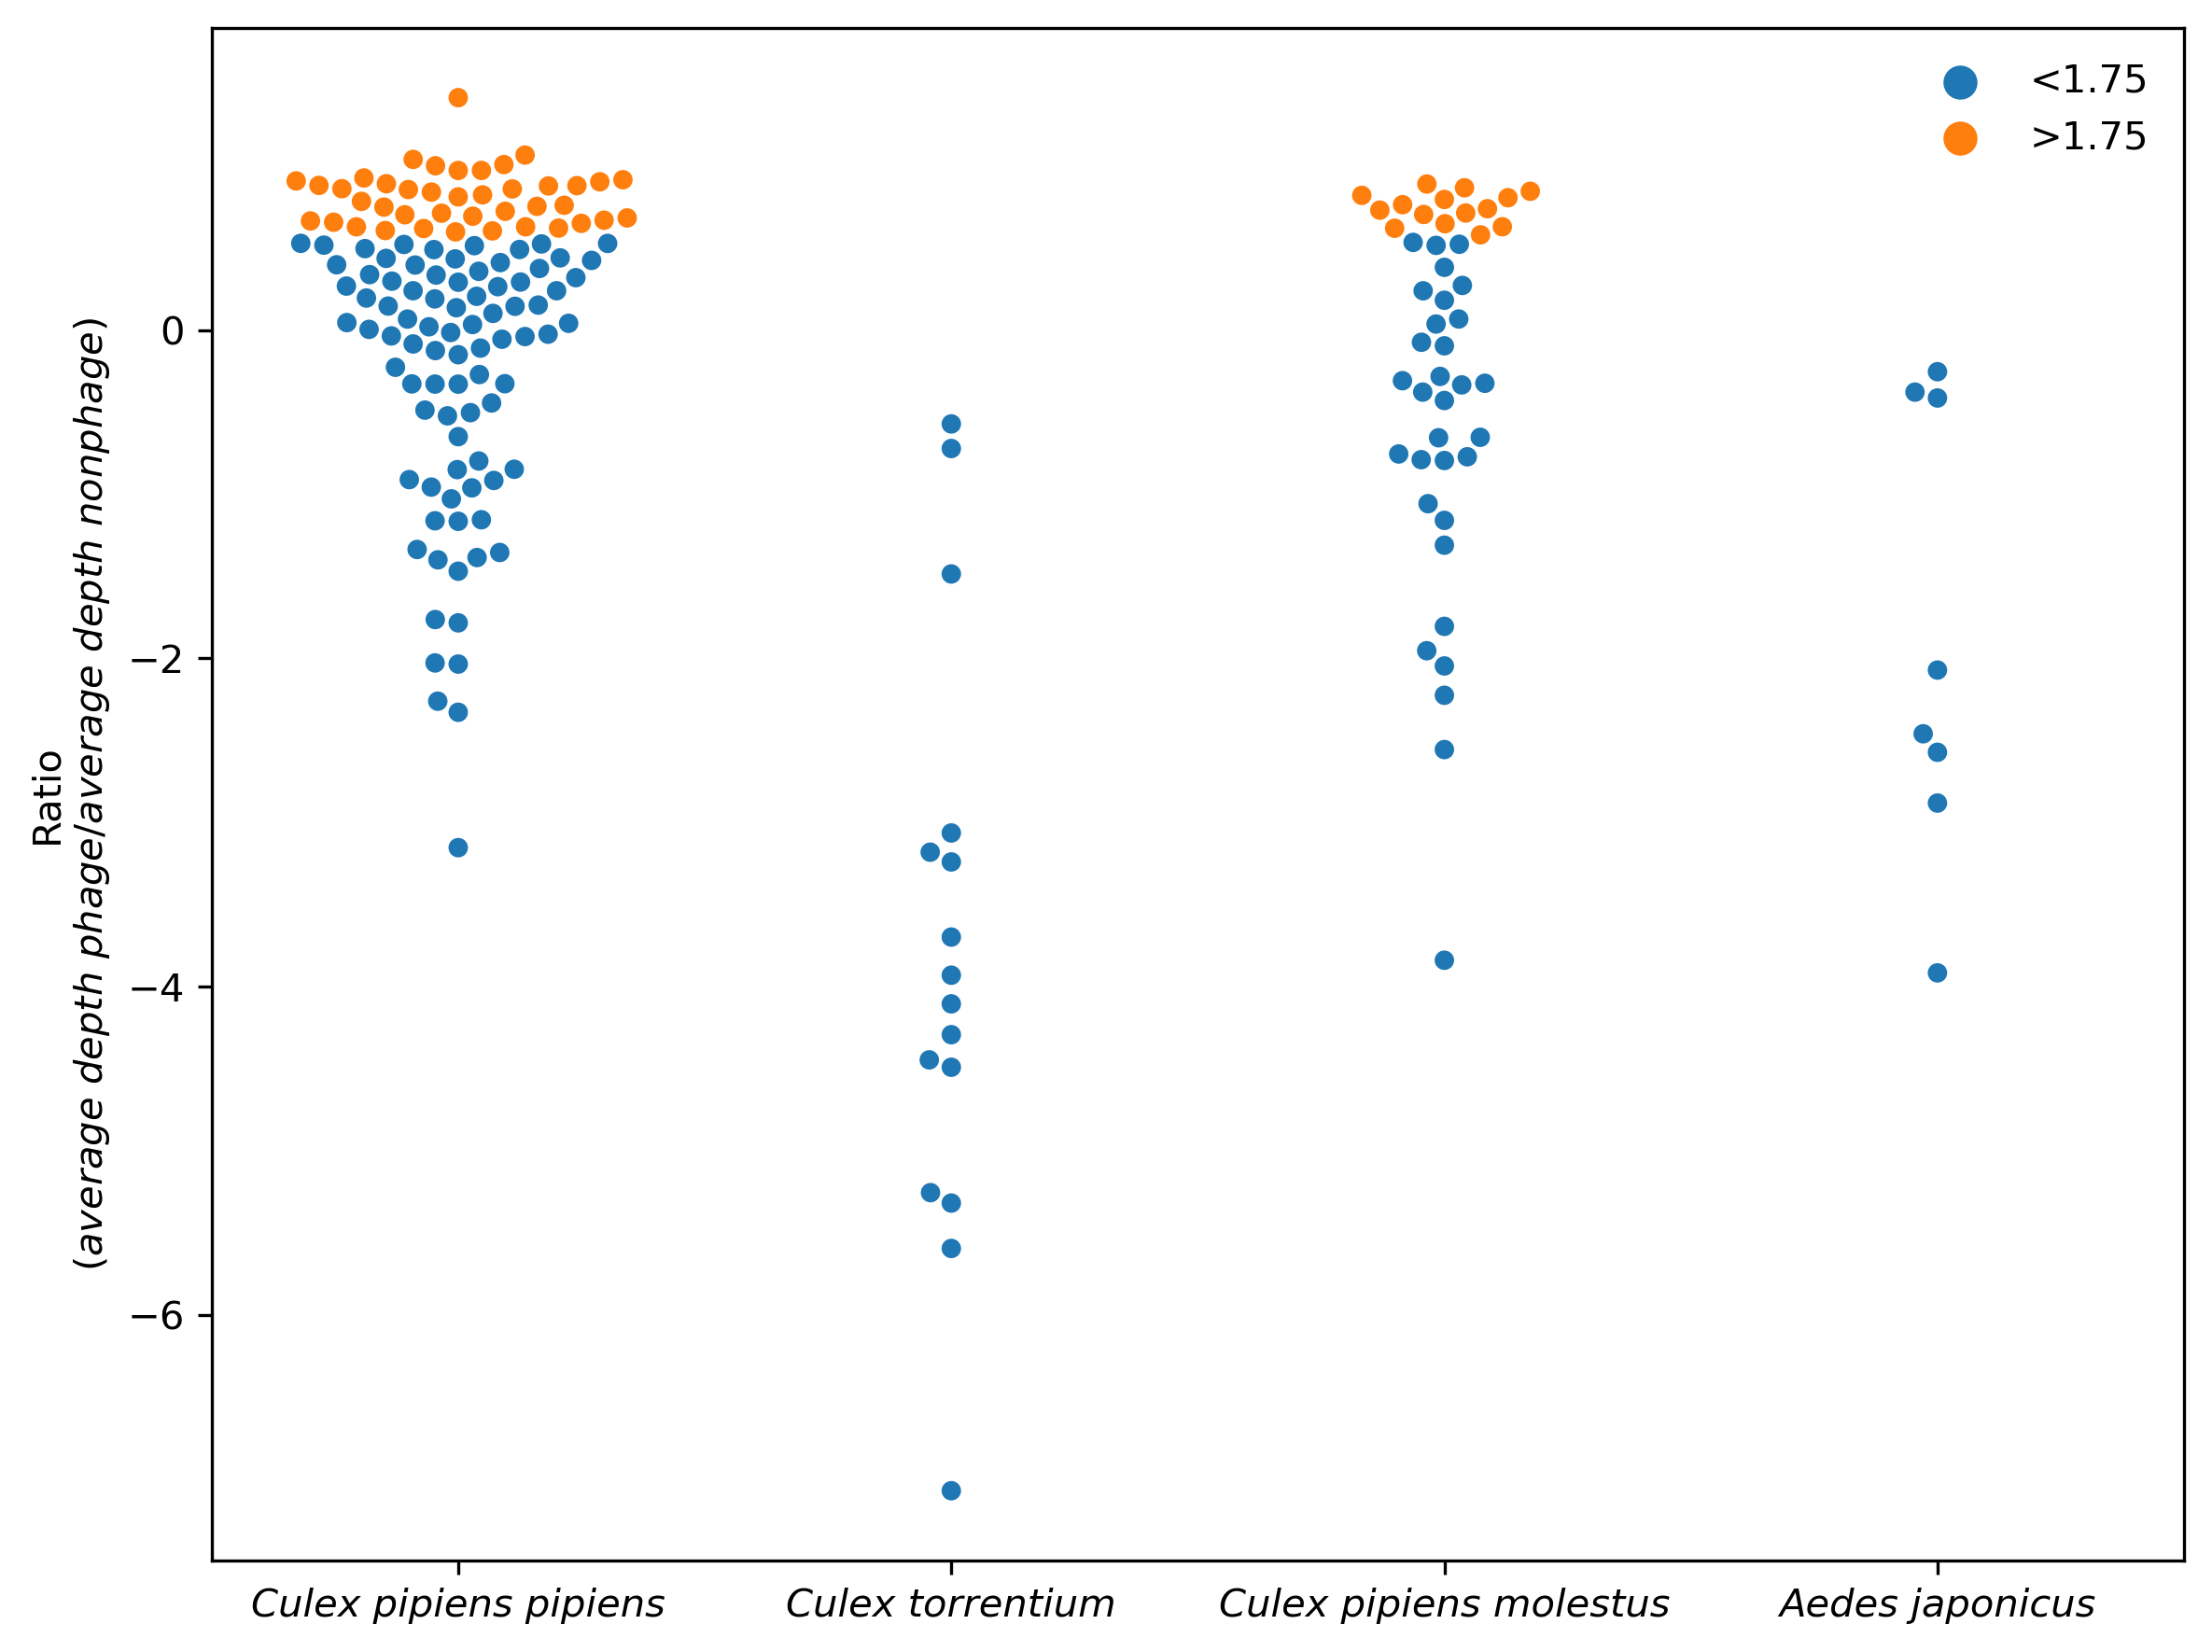

In [93]:
figure(figsize=(8, 6), dpi=300)
p=sns.swarmplot(data=ratiodf, y='natural_log', hue='color', x='SKA_Subspecies')
p.set(xlabel=None, ylabel='Ratio\n$(average\ depth\ phage/average\ depth\ nonphage$)')
p.set_xticklabels(labels=ratiodf['SKA_Subspecies'].unique(), fontstyle ="italic")
p.legend(frameon=False).set_title(None)
plt.tight_layout()
#plt.savefig("phage_ratio.pdf", bbox_inches="tight", dpi=300)